# Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the training dataset

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Understanding the data

### determining the data type of each column

In [4]:
train.dtypes
train.get_dtype_counts()

float64    4
int64      1
object     8
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## This is the target Variable which is to be predicted

In [6]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
train['Loan_Status'].value_counts(normalize = True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

* This means that out of 614 people, only 422 loans were passed (68.72%) 

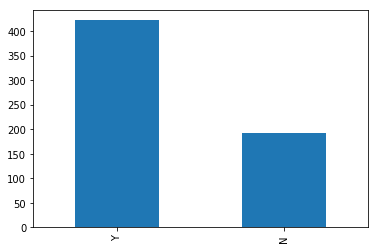

In [8]:
train['Loan_Status'].value_counts().plot.bar()

# Visualizing the Categorical Variables

Categorical features: 
   
* These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

In [9]:
# Categorical Variables : Gender,Married, Self_Employed,Credit History


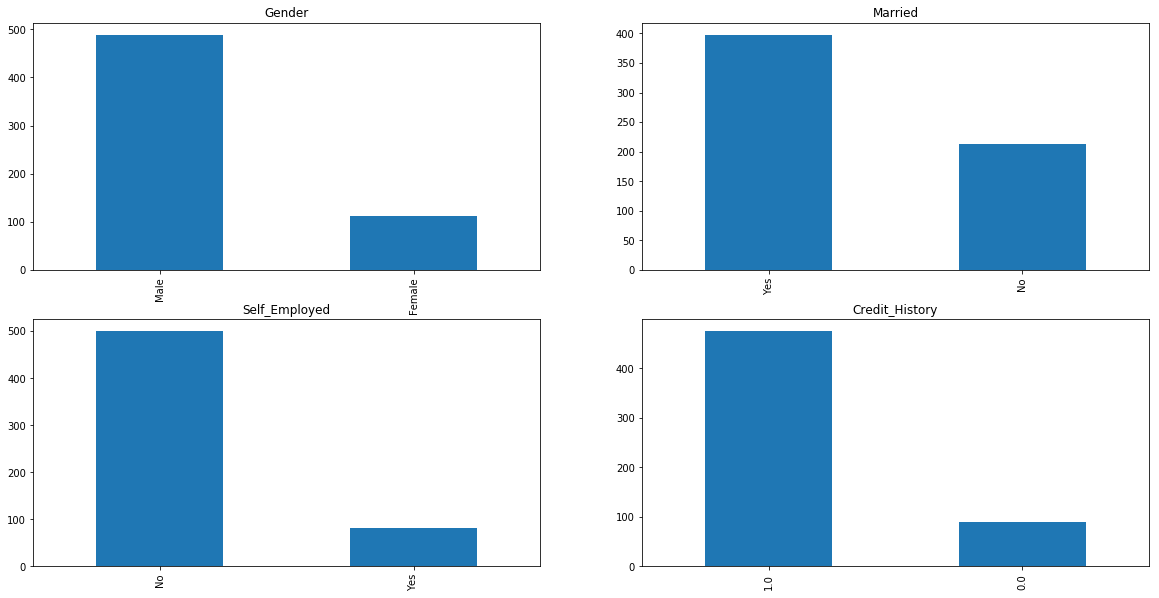

In [10]:
plt.subplot(221)
train['Gender'].value_counts().plot.bar(figsize = (20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts().plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts().plot.bar(title = 'Self_Employed')
plt.subplot(224) 
train['Credit_History'].value_counts().plot.bar(title= 'Credit_History')

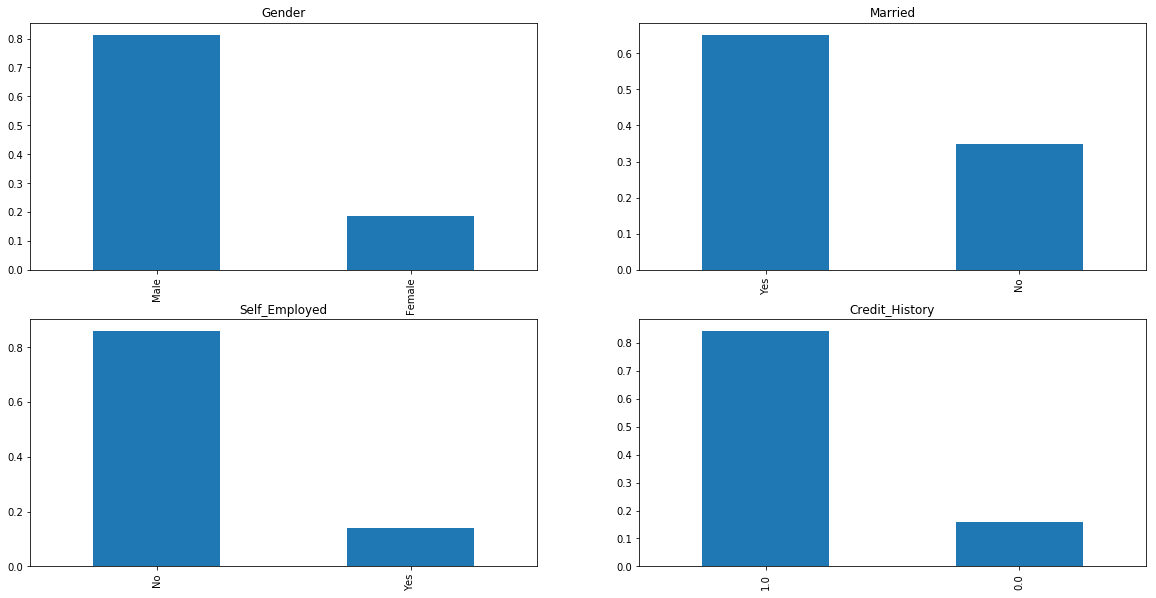

In [11]:
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')
plt.subplot(224) 
train['Credit_History'].value_counts(normalize = True).plot.bar(title= 'Credit_History')

It can be inferred from the above bar plots that:

* 80% applicants in the dataset are male.

* Around 65% of the applicants in the dataset are married.

* Around 15% applicants in the dataset are self employed.

* Around 85% applicants have repaid their debts.

# Visualizing the Oridinal Variables

Ordinal features:

Variables in categorical features having some order involved (Dependents, Education, Property_Area)

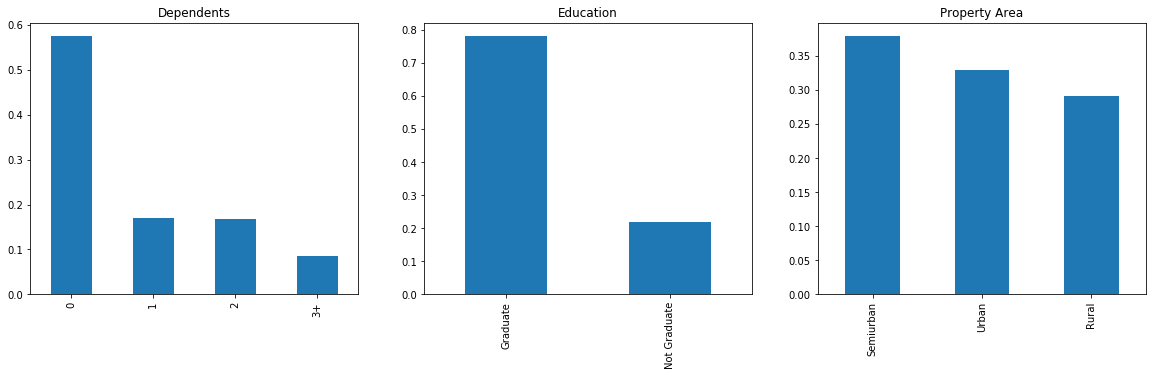

In [12]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize=(20,5),title = 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property Area')

plt.show()

# Visualizing the Independent Variable (Numerical)

Numerical variable : ApplicantIncome, CoapplicantIncome, loan_Amt,Loan_Amount_Term

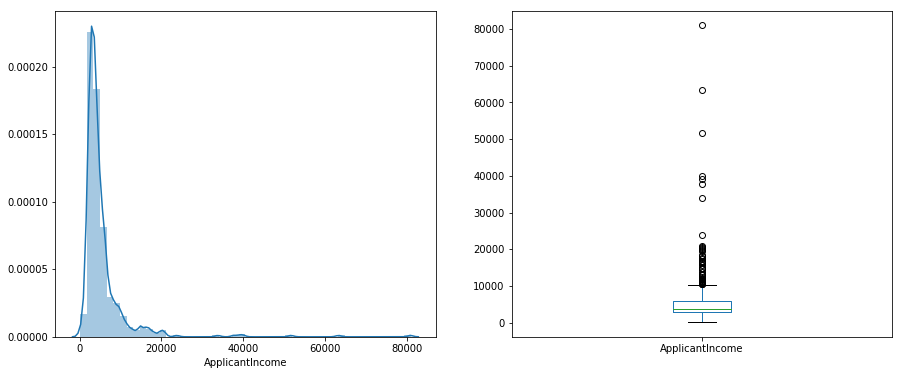

In [13]:
# Visualizing for ApplicantIncome
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (15,6))

* It can be inferred that most of the data in the distribution of applicant income is towards left which means **it is not normally distributed** . We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

* The **boxplot confirms the presence of a lot of outliers/extreme values** . This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

**Let us combine the Applicant Income with the Education and see the results**

Text(0.5, 0.98, '')

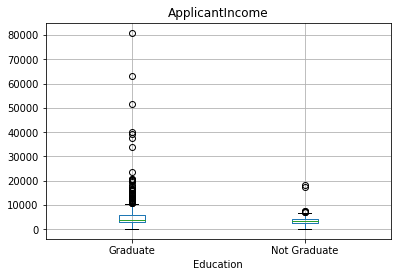

In [14]:
train.boxplot(column = 'ApplicantIncome', by ='Education')
plt.suptitle("")

[]

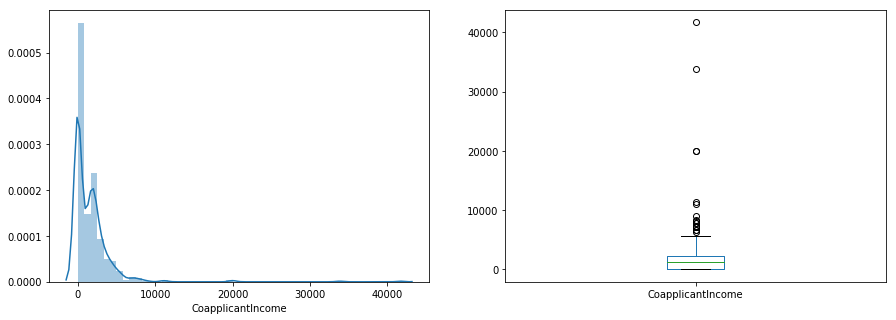

In [15]:
# Visualizing for CoApplicantIncome
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (15,5))

plt.plot()

* We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a **lot of outliers in the coapplicant income and it is not normally distributed**

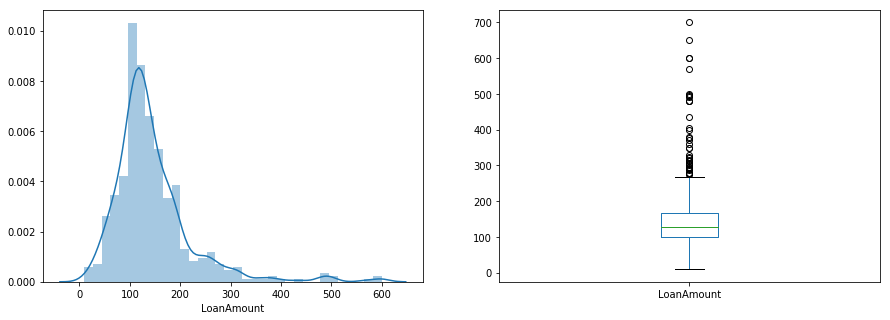

In [16]:
# Visualizing for Loan_Amount
df = train.dropna()
plt.figure(1)
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (15,5))

*We see a **lot of outliers** in this variable and the **distribution is fairly normal.** We will treat the outliers in later sections.

**After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable**

# Categorical Independent Variable vs Target Variable

* First of all we will find the **relation between target variable and categorical independent variables.**
* Let us look at the **stacked bar plot now which will give us the proportion of approved and unapproved loans.**

### 1. Gender vs Loan_Status

In [17]:
Gender = pd.crosstab(index = train['Gender'],columns = train['Loan_Status'])  
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [18]:
Gender.div(Gender.sum(1).astype(float),axis = 0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


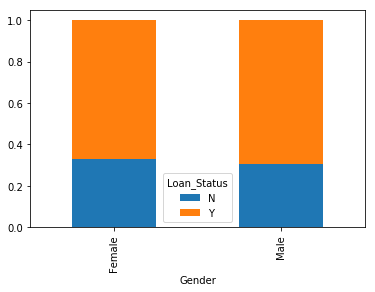

In [19]:
Gender.div(Gender.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True)

* It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans

### 2. Married vs Loan_Status

In [20]:
Married = pd.crosstab(index = train['Married'], columns = train['Loan_Status'])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


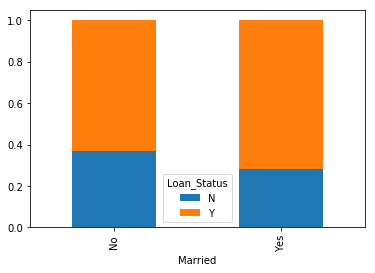

In [21]:
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

### 3. Dependents vs Loan_Status  4. Education vs Loan_Status  5. Self_Employed vs Loan_Status

In [22]:
Dependents = pd.crosstab(index = train['Dependents'], columns = train['Loan_Status'])
Education = pd.crosstab(index = train['Education'], columns = train['Loan_Status'])
Self_Employed = pd.crosstab(index = train['Self_Employed'], columns = train['Loan_Status'])

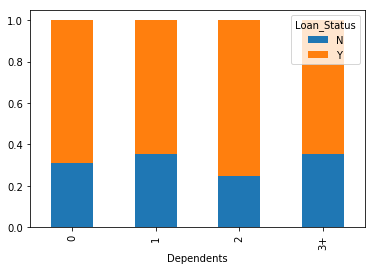

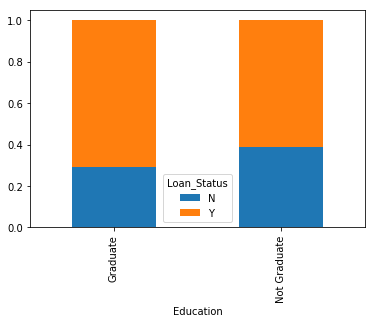

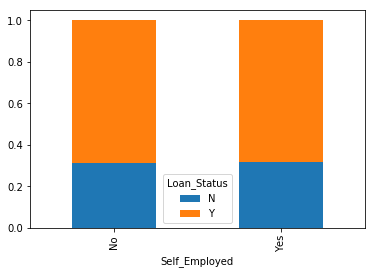

In [23]:
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True)
plt.show()
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True)
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True)
plt.show()

* Proportion of **married applicants is higher for the approved loans.**
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

### 6. Credit_history vs Loan_Status

In [24]:
Credit_History = pd.crosstab(index = train['Credit_History'], columns = train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


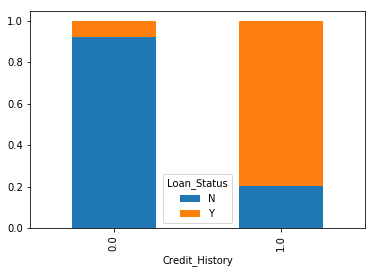

In [25]:
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

* **It seems people with credit history as 1 are more likely to get their loans approved.**

### 7. Property_Area vs Loan_Status

In [26]:
Property_Area = pd.crosstab(index = train['Property_Area'], columns=train['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


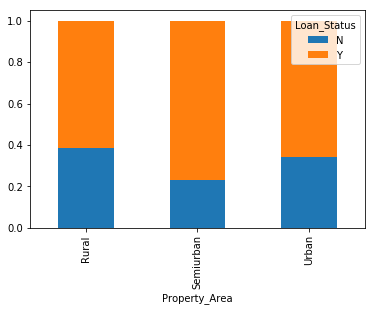

In [27]:
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked =  True)

* **Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas**

#### Now let’s visualize numerical independent variables with respect to target variable.



# Numerical Independent Variable vs Target Variable

### 1. Applicant_Income vs Loan_Status

In [28]:
ApplicantIncome = pd.crosstab(index = train['ApplicantIncome'], columns = train['Loan_Status'])
ApplicantIncome.shape

(505, 2)

* as you can see the shape of the **ApplicantIncome** when we create the crosstab, is very complex (505,2). So now here we will create **bins** or **interval** for which the **relation bewtween ApplicantIncome and Loan_Status** can be monitored.

In [29]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [30]:
bins = [0,2500,4000,6000,81000]
group = ['low','average','high','very high']

# Creating a new Column(income_bin) in the dataset
train['Income_Bin'] = pd.cut(train['ApplicantIncome'],bins = bins, labels = group)
train['Income_Bin'].value_counts()

average      226
high         143
very high    137
low          108
Name: Income_Bin, dtype: int64

In [31]:
# Creating a crosstab with the Loan_Status
Income_Bin = pd.crosstab(index = train['Income_Bin'], columns = train['Loan_Status'])
Income_Bin

Loan_Status,N,Y
Income_Bin,,
low,34,74
average,67,159
high,45,98
very high,46,91


Text(0, 0.5, 'Percentage')

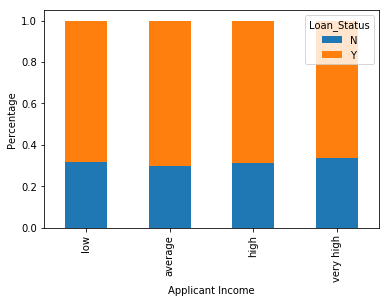

In [32]:
# Visualizing this data
Income_Bin.div(Income_Bin.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

* It can be inferred that **Applicant income does not affect the chances of loan approval** which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

### 2. Coapplicant_Income vs Loan_Status

In [33]:
train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [34]:
bins1 = [0,1200,3000,41667]
group1 = ['Low','Average','High']

#Creating a new Column as (CoapplicantIncome_Bins)
train['CoapplicantIncome_Bins'] = pd.cut(df['CoapplicantIncome'],bins = bins1, labels = group1)
train['CoapplicantIncome_Bins'].value_counts()

Average    160
High        77
Low         27
Name: CoapplicantIncome_Bins, dtype: int64

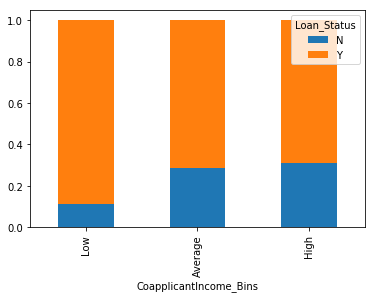

In [35]:
CoapplicantIncome_Bins = pd.crosstab(index = train['CoapplicantIncome_Bins'], columns = train['Loan_Status'])
CoapplicantIncome_Bins.div(CoapplicantIncome_Bins.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)

* It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that **most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it.**
* So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

### 3. Total_income vs Loan_Status
##### Total_income =  Applicant_Income + Coapplicant_Income

In [36]:
train['Total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Total_income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_income, dtype: float64

In [37]:
bins2 = [0,2500,4000,6000,81000]
group2 = ['Low','Average','High','Very High']
train['Total_income_bins'] = pd.cut(train['Total_income'],bins = bins2, labels = group2)
train['Total_income_bins'].value_counts()

Very High    247
High         224
Average      119
Low           24
Name: Total_income_bins, dtype: int64

In [38]:
Total_income_bins = pd.crosstab(index = train['Total_income_bins'], columns = train['Loan_Status'])
Total_income_bins

Loan_Status,N,Y
Total_income_bins,,
Low,14,10
Average,32,87
High,65,159
Very High,81,166


Text(0, 0.5, 'Percentage')

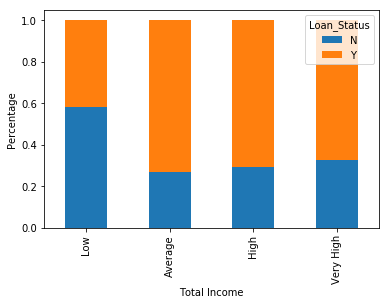

In [39]:
Total_income_bins.div(Total_income_bins.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked= True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

* We can clearly conclude that the **proportions of Approved loans for applicant having low Total Income is very less as compared to the others**

### 4. LoanAmount vs Loan_Status

In [40]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [41]:
bins = [0,100,200,700]
group3 = ['Low','Average','High']
train['LoanAmount_Bins'] = pd.cut(train['LoanAmount'],bins, labels = group3)
train['LoanAmount_Bins'].value_counts()

Average    358
Low        154
High        80
Name: LoanAmount_Bins, dtype: int64

In [42]:
LoanAmount_Bins = pd.crosstab(index = train['LoanAmount_Bins'], columns = train['Loan_Status'])
LoanAmount_Bins

Loan_Status,N,Y
LoanAmount_Bins,,
Low,47,107
Average,103,255
High,31,49


Text(0, 0.5, 'Percentage')

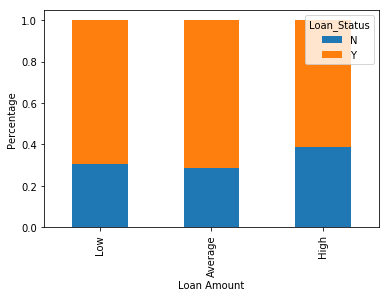

In [43]:
LoanAmount_Bins.div(LoanAmount_Bins.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

### Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [44]:
train = train.drop(['Income_Bin','CoapplicantIncome_Bins','Total_income','Total_income_bins','LoanAmount_Bins'],axis = 1)


In [45]:
train['Dependents'].replace('3+',3,inplace = True)

In [46]:
train['Loan_Status'].replace('N',0,inplace= True)
train['Loan_Status'].replace('Y',1,inplace = True)

#### Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

In [47]:
matrix = train.corr()
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


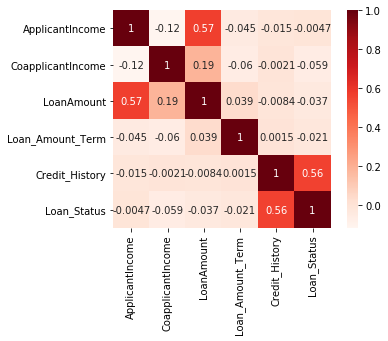

In [48]:
sns.heatmap(matrix,annot=True,square=True,cmap = 'Reds')

#annot gives the the corelation values in each block
#cmap is used to define the color of the Matrix

The Most correlated variables are:
* ApplicantIncome - LoanAmount
* Credit_History- Loan_Status
* LoanAmount - CoapplicantIncome

### Taking care of the missing values

In [49]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Filling the mssing values
Categoricas Variables:
* 1. Gender
* 2. Married
* 3. Dependents
* 4. Self_Employed
* 5. Credit_History
* **We will replace the missing values of the Categorical Variables with MODE**

Numerical Variables:
* 1. LoanAmount
* 2. Loan_Amount_Term

* We saw the boxplot of these variables and there were many outliers ** so we cannot use MEAN to replace the missing values, instead we will use MEDIAN or MODE**

In [50]:
# You can run this field only once because it will change the whole dataset

train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

In [51]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)

In [52]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [53]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)

In [54]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Importing Test data

In [55]:
test = pd.read_csv('test.csv')

In [56]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Filing the missing values of the Test Data in the same way as Train Data

In [57]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)

In [58]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace = True)

In [59]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace = True)

In [60]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

# Building the Model

In [61]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

### Splitting the dataset into Dependent and independent variables

In [62]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

### Creating dummy variables for the categorical variable

In [63]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [65]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)

C:\Users\Shrunali\Anaconda3\envs\workspace\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

### Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [66]:
pred_cv = model.predict(x_cv)
accuracy = accuracy_score(y_cv,pred_cv)*100

In [67]:
print("Accuracy: {0:.2f}%".format(accuracy))

Accuracy: 81.62%
